In [12]:
import pickle
import pandas as pd
from clustering import *
from objects import *

In [13]:
with open("pickles/clustering.normal.pickle", "rb") as log:
    kmeans_normal = pickle.load(log)

with open("pickles/clustering.discrete.pickle", "rb") as log:
    kmeans_discrete = pickle.load(log)

In [14]:
entry_normal = kmeans_normal["Self-reported satisfaction - AVG Monthly hours"]
entry_discrete = kmeans_discrete["Self-reported satisfaction - AVG Monthly hours"]

In [15]:
entry_normal = kmeans_normal["AVG Monthly hours - Time in company, in years"]

In [16]:
hr = HR(data)
df = hr.normal
#df = hr.normal.assign(cluster=entry_normal[4][0]["cluster"])

In [17]:
phi = pd.crosstab(df["left"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

KeyError: 'cluster'

In [18]:
df = df[["left", "cluster", "time_spend_company"]]
df = df[df["left"] == 1]
phi = pd.crosstab(df["time_spend_company"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

KeyError: "['cluster'] not in index"

In [19]:
entry_normal = kmeans_normal["AVG Monthly hours - Time in company, in years"]
entry_discrete = kmeans_discrete["AVG Monthly hours - Time in company, in years"]

df = hr.discrete.assign(cluster=entry_discrete[5][0]["cluster"])
df = df[["left", "average_montly_hours", "cluster", "time_spend_company", "salary"]]
df_low = df[(df["left"] == 1) & (df["salary"] == "low")]
df_medium = df[(df["left"] == 1) & (df["salary"] == "medium")]
df_high = df[(df["left"] == 1) & (df["salary"] == "high")]
phi = pd.crosstab(df["salary"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

cluster,0,1,2,3,4
salary,,,,,
high,0.210994,0.153597,0.186742,0.227971,0.220695
low,0.217059,0.175506,0.208447,0.177146,0.221843
medium,0.231306,0.167856,0.195780,0.192367,0.212690


In [14]:
l = list()

for i in range(5):
    cl = df[df["cluster"] == i]
    l.append((min(cl["average_montly_hours"]), max(cl["average_montly_hours"]),
             min(cl["time_spend_company"]), max(cl["time_spend_company"])))
    
l

[(216, 252, 2, 10),
 (96, 146, 2, 10),
 (253, 310, 2, 10),
 (179, 215, 2, 10),
 (147, 178, 2, 10)]

In [35]:
df = hr.discrete.assign(cluster=entry_discrete[5][0]["cluster"])
df = df[["left", "average_montly_hours", "cluster", "time_spend_company", "salary"]]
df = df[df["left"] == 1]
phi = pd.crosstab(df["left"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

cluster,0,1,2,3,4
left,,,,,
1,0.193503,0.25315,0.33604,0.017362,0.199944


In [29]:
c0 = pd.Series([21, 21, 23])
c1 = pd.Series([15, 16, 17])
c2 = pd.Series([18, 20, 19])
c3 = pd.Series([22, 17, 19])
c4 = pd.Series([22, 22, 21])
l = [c0, c1, c2, c3, c4]
means = list(map(lambda x: x.mean(), l))
std = list(map(lambda x: x.std(), l))
means, std

([21.666666666666668, 16.0, 19.0, 19.333333333333332, 21.666666666666668],
 [1.1547005383792515, 1.0, 1.0, 2.5166114784235836, 0.57735026918962584])

In [26]:
colors = large_palette_full

for key in ["AVG Monthly hours - Time in company, in years"]:
    entry_normal = kmeans_normal[key]

    for k in [5]:
        df = entry_normal[k][0]
        columns = list(df.columns)
        columns.remove("cluster")
        centroids = entry_normal[k][1]["centroids"]
        figure, axes = pp.subplots()

        for cluster_idx, color in zip(range(k), list(colors.values())):
            title = labels_pretty_print[columns[0]] + " - " + labels_pretty_print[columns[1]] + " - " + str(k)
            points = df[df["cluster"] == cluster_idx]
            axes.scatter(points[columns[0]], points[columns[1]], color=color)
            #axes.scatter(centroids[cluster_idx], centroids[cluster_idx], color=color, marker="v", s=150)

        axes.set_xlabel(labels_pretty_print[columns[0]])
        axes.set_ylabel(labels_pretty_print[columns[1]])
        #axes.legend()
        pp.title(title)
        #pp.savefig(title + ".png")
        #pp.savefig(title + ".svg")

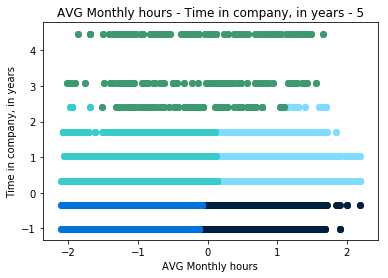

In [23]:
pp.show()

In [56]:
pp.cla()
pp.clf()
pp.close(figure)